# Reinforcement Learning
There are three problems:
1. Single Bandit Problem, 
2. UCB Algorithms 
3. Solving Problem 1 and 2 with $10,000$ arms

### Libraries

Stick to `NumPy` and a library such as `matplotlib`, `seaborn` or `plotly` for rendering plots.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

You will be simulating the 10-armed bandit testbed.


### Single Bandit problem

The bandit problem should have $10$ arms. For each arm, the $q_{*}(a)$ value should be sampled from a Gaussian distribution with $0$ mean and unit variance . The rewards from arm $a$ should be sampled from a Gaussian distribution with mean $q_{}(a)$  and unit variance .


### Testbed

Generate 2000 different bandit problems. Use the sample average method with incremental implementation for learning the action values. Plot the learning curves for 1000 timesteps with the following algorithms:

- gready
- $ϵ$-greedy
  - $ϵ$-0.1
  - $ϵ$-0.01

There are two learning curves for each algorithm:
- average reward vs time
- %  optimal actions vs time

You have to reproduce the following two curves:
1. Average rewards vs # of steps
2. % optimal action vs # of steps



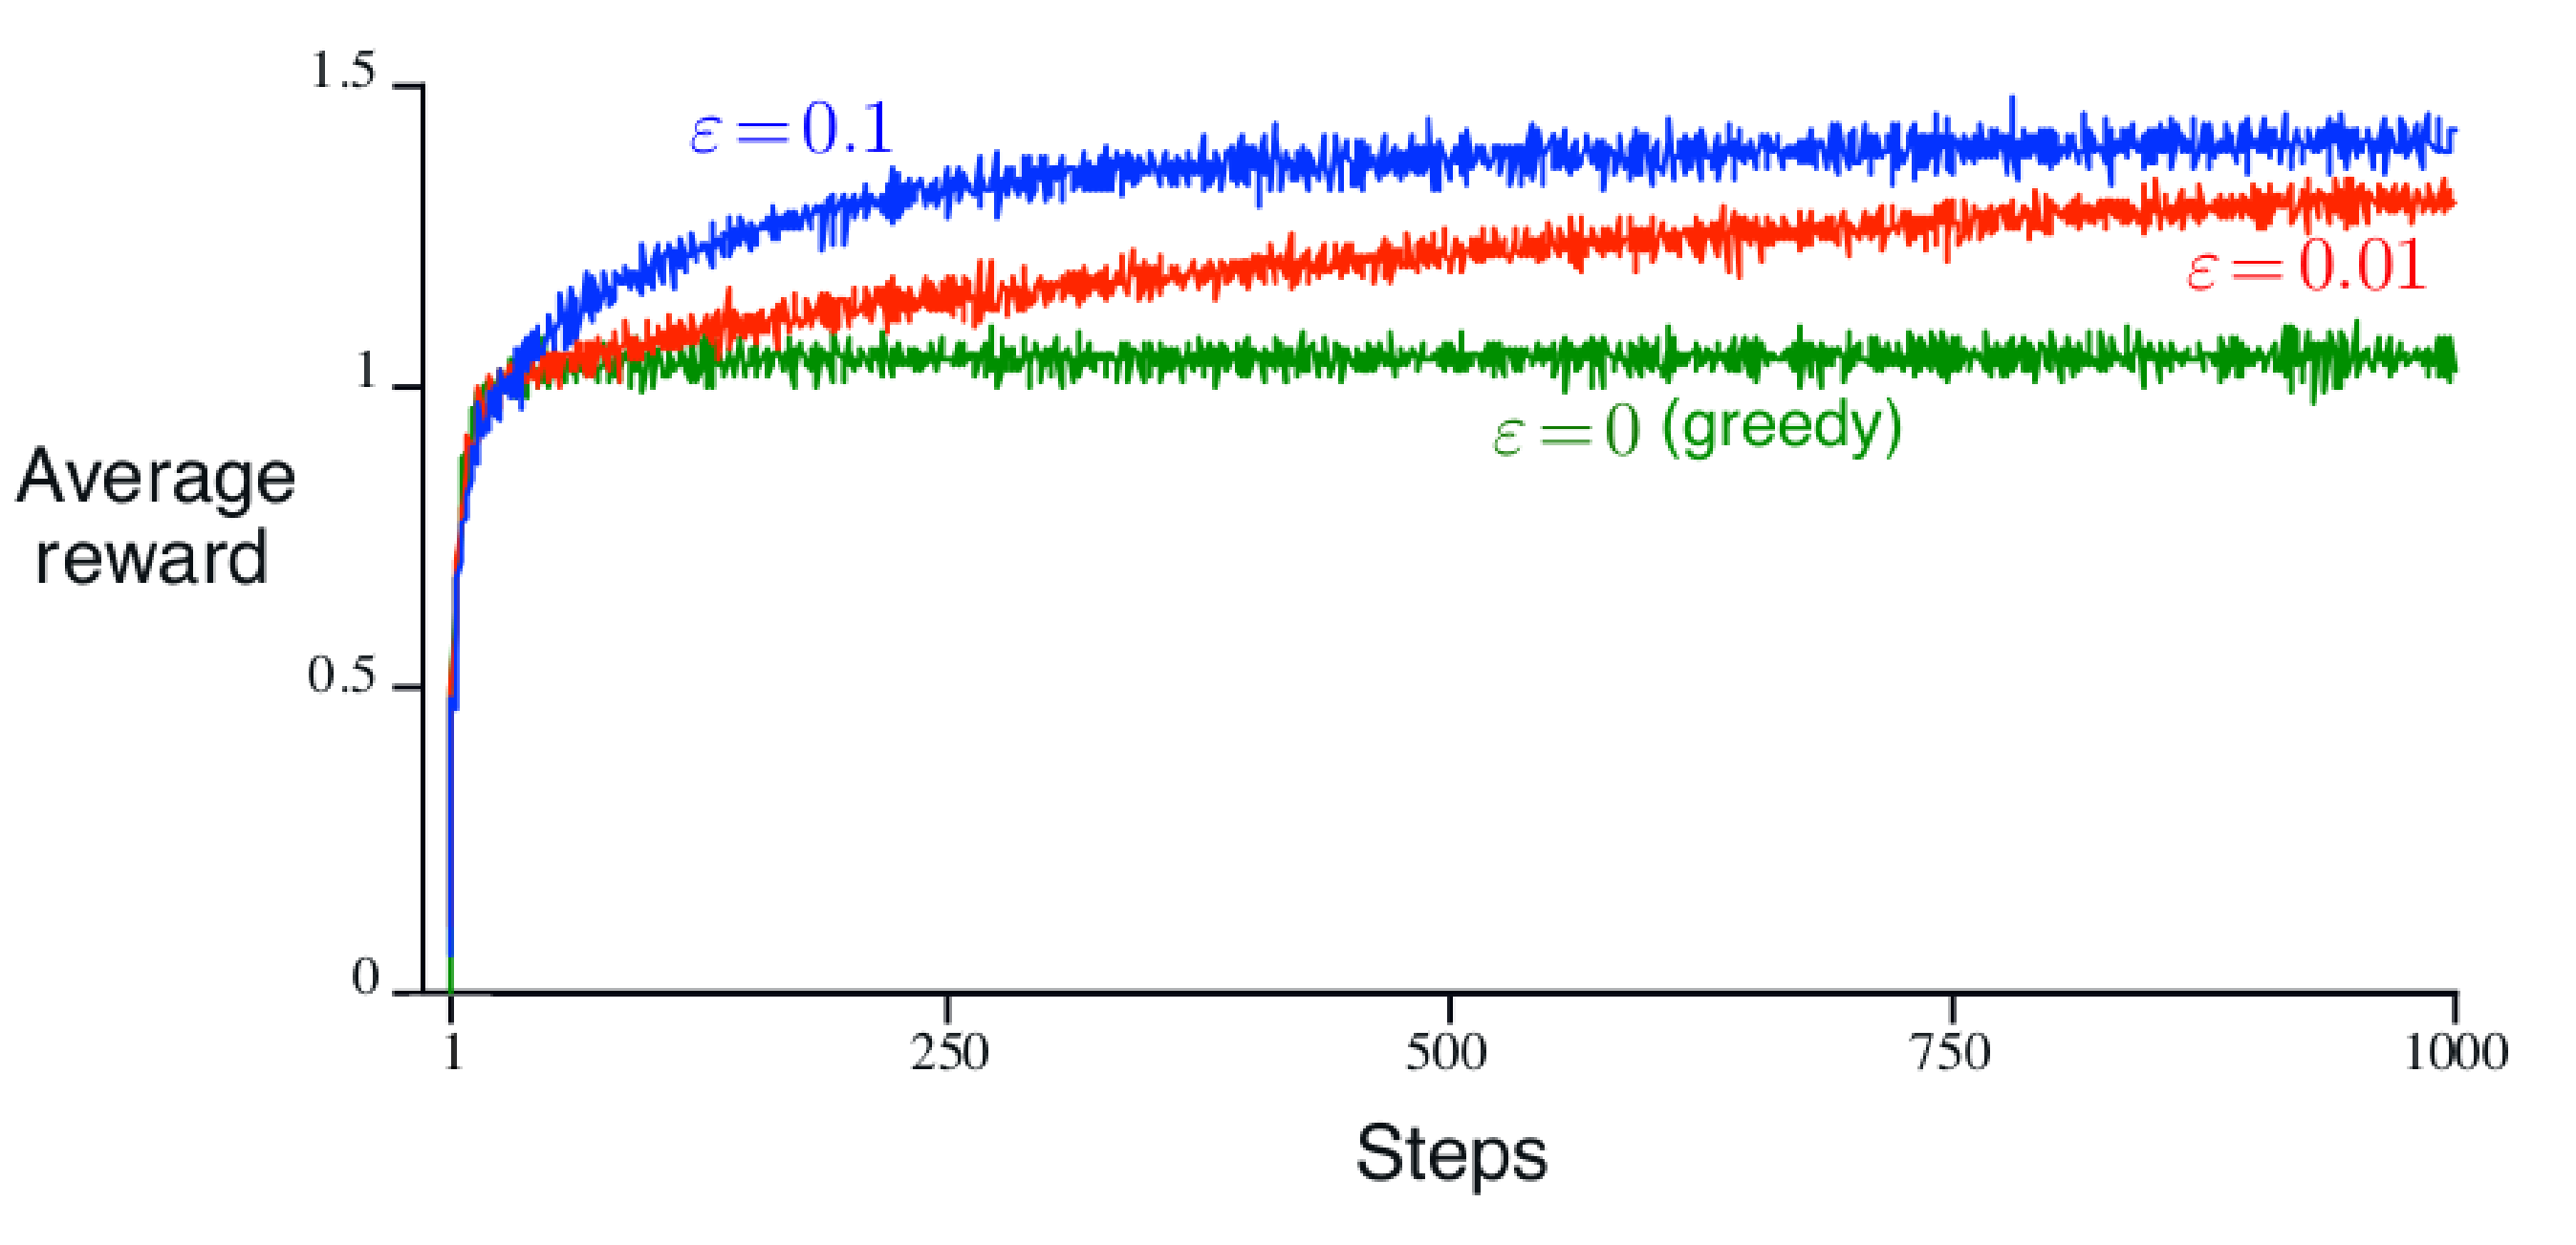

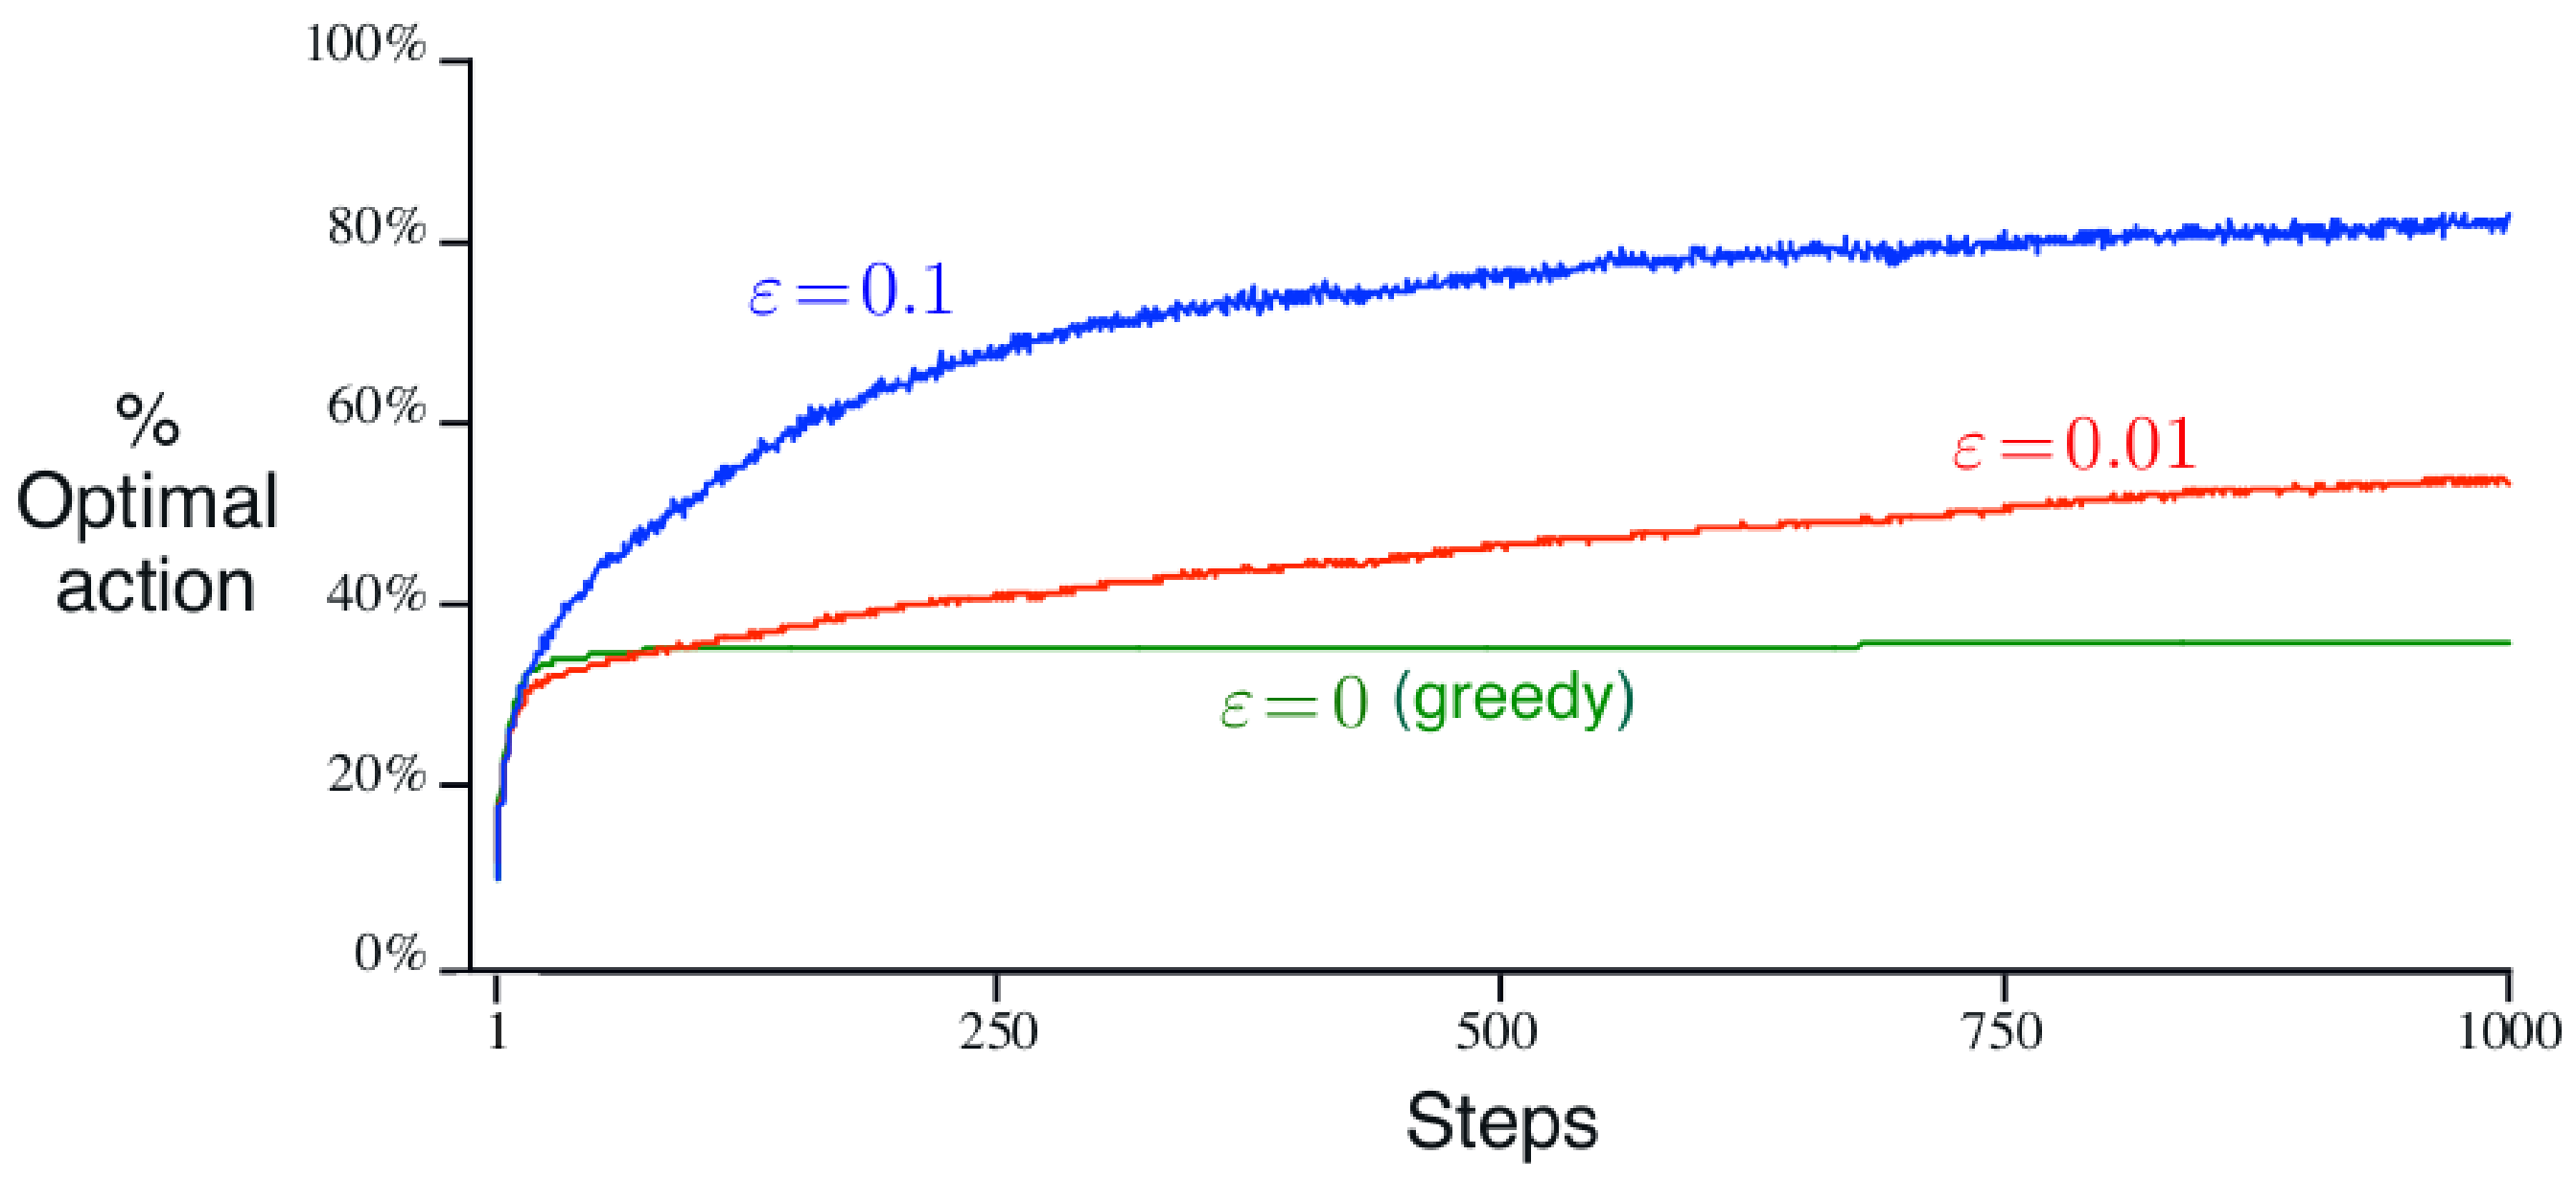

**Hint**: the averaging at each time step is done over all the 2000 bandit problems. For example, to
plot a single point $(t,r(t))$ in the "average reward plot", find the reward sampled from each of the 2000  bandits at time $t$ and compute their average. This value will be $r(t)$.

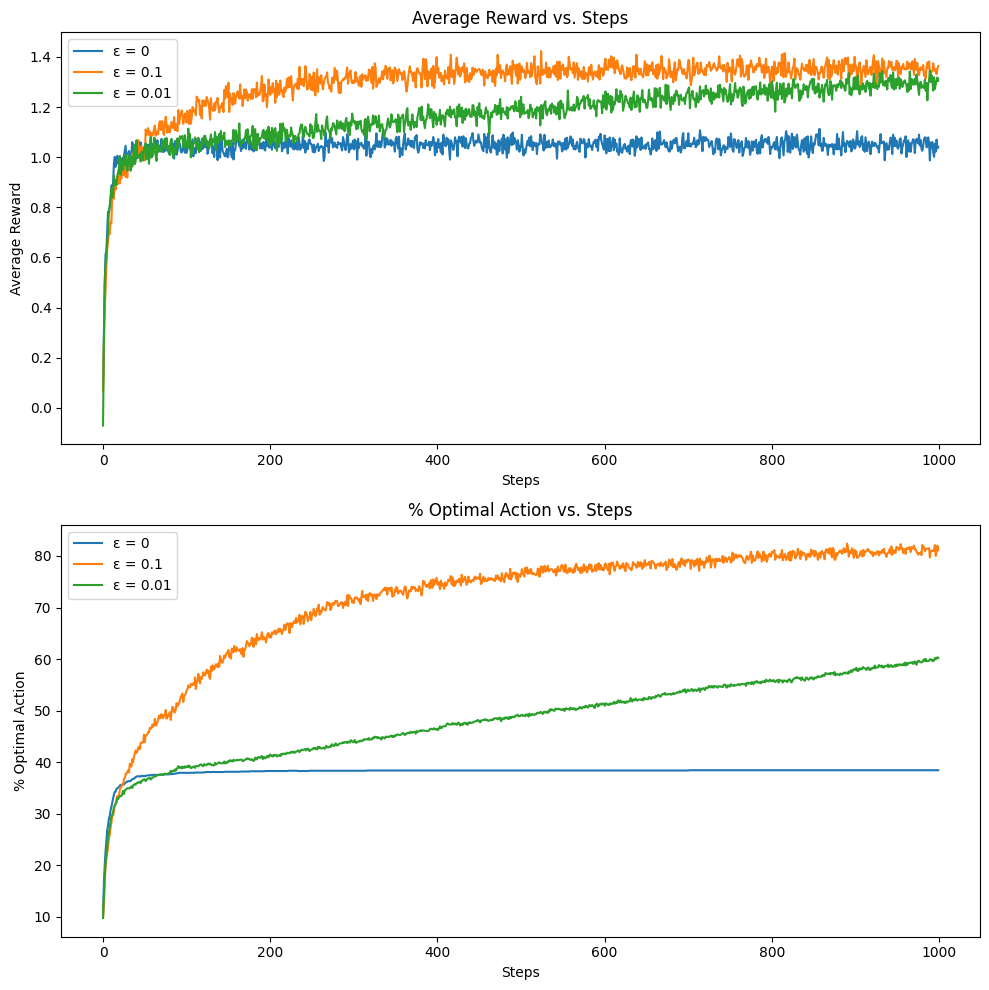

In [20]:
num_bandits = 2000
num_arms = 10
num_steps = 1000

epsilons = [0, 0.1, 0.01]

def run_bandit_problem(epsilon, num_bandits, num_arms, num_steps):
    rewards = np.zeros((num_bandits, num_steps))
    optimal_actions = np.zeros((num_bandits, num_steps))

    for bandit in range(num_bandits):
        q_star = np.random.randn(num_arms)
        optimal_action = np.argmax(q_star)
        q_estimates = np.zeros(num_arms)
        action_counts = np.zeros(num_arms)

        for step in range(num_steps):
            if np.random.rand() < epsilon:
                action = np.random.choice(num_arms)
            else:
                action = np.argmax(q_estimates)
            reward = np.random.randn() + q_star[action]
            action_counts[action] += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]
            rewards[bandit, step] = reward
            if action == optimal_action:
                optimal_actions[bandit, step] = 1
    avg_rewards = np.mean(rewards, axis=0)
    avg_optimal_actions = np.mean(optimal_actions, axis=0)

    return avg_rewards, avg_optimal_actions

results = {}
for epsilon in epsilons:
    avg_rewards, avg_optimal_actions = run_bandit_problem(epsilon, num_bandits, num_arms, num_steps)
    results[epsilon] = (avg_rewards, avg_optimal_actions)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for epsilon in epsilons:
    axes[0].plot(results[epsilon][0], label=f'ε = {epsilon}')
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Average Reward')
axes[0].legend()
axes[0].set_title('Average Reward vs. Steps')

for epsilon in epsilons:
    axes[1].plot(results[epsilon][1] * 100, label=f'ε = {epsilon}')
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('% Optimal Action')
axes[1].legend()
axes[1].set_title('% Optimal Action vs. Steps')

plt.tight_layout()
plt.show()


### Observations from problem-1

The ϵ=0.1 typically provides a good balance, resulting in higher average rewards and a higher percentage of optimal actions over time.

## Problem 2

Run the UCB algorithm on the ten-armed testbed. Plot the learning curve for UCB and compare it with $\epsilon$-greedy for $\epsilon = 0.1$. Reproduce the following learning curves averaged over 2000  bandits for 1000 timesteps:

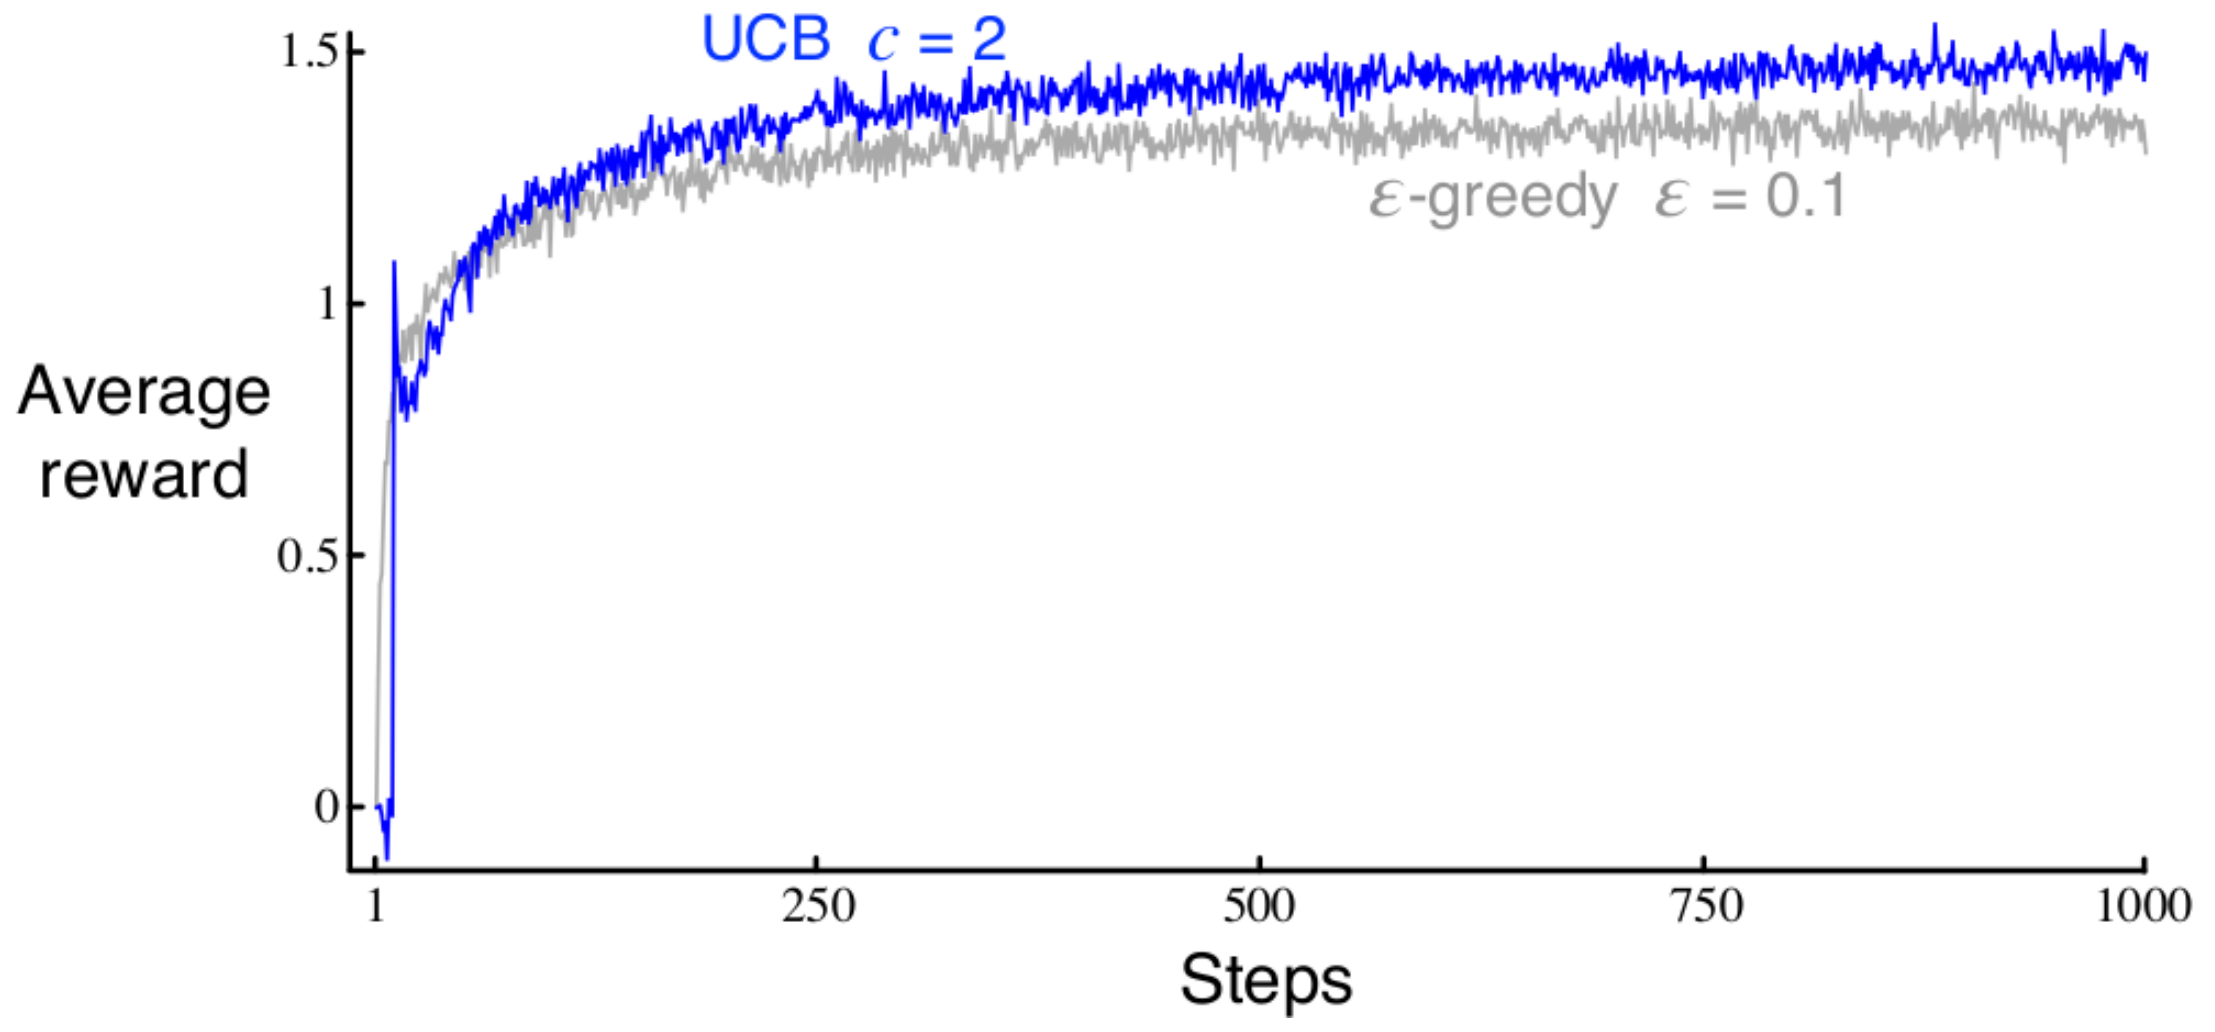

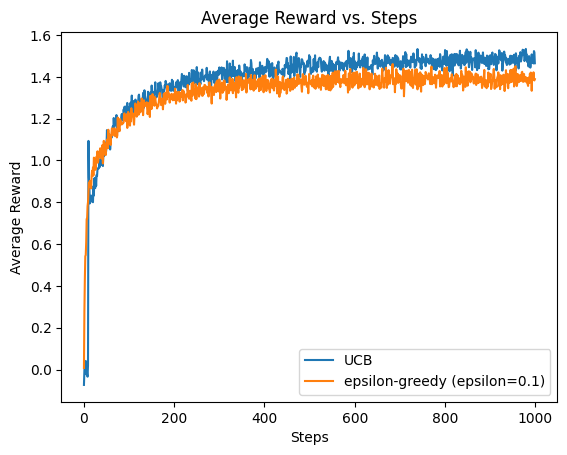

In [19]:
num_bandits = 2000
num_arms = 10
num_steps = 1000
epsilon = 0.1
c = 2

def run_ucb_bandit_problem(num_bandits, num_arms, num_steps, c):
    rewards = np.zeros((num_bandits, num_steps))
    optimal_actions = np.zeros((num_bandits, num_steps))

    for bandit in range(num_bandits):
        q_star = np.random.randn(num_arms)
        optimal_action = np.argmax(q_star)

        q_estimates = np.zeros(num_arms)
        action_counts = np.zeros(num_arms)
        total_counts = 0

        for step in range(num_steps):
            if step < num_arms:
                action = step
            else:
                ucb_values = q_estimates + c * np.sqrt(np.log(total_counts + 1) / (action_counts + 1e-5))
                action = np.argmax(ucb_values)

            reward = np.random.randn() + q_star[action]
            action_counts[action] += 1
            total_counts += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

            rewards[bandit, step] = reward
            if action == optimal_action:
                optimal_actions[bandit, step] = 1

    avg_rewards = np.mean(rewards, axis=0)
    avg_optimal_actions = np.mean(optimal_actions, axis=0)

    return avg_rewards, avg_optimal_actions

def run_epsilon_greedy_bandit_problem(epsilon, num_bandits, num_arms, num_steps):
    rewards = np.zeros((num_bandits, num_steps))
    optimal_actions = np.zeros((num_bandits, num_steps))

    for bandit in range(num_bandits):
        q_star = np.random.randn(num_arms)
        optimal_action = np.argmax(q_star)

        q_estimates = np.zeros(num_arms)
        action_counts = np.zeros(num_arms)

        for step in range(num_steps):
            if np.random.rand() < epsilon:
                action = np.random.choice(num_arms)
            else:
                action = np.argmax(q_estimates)

            reward = np.random.randn() + q_star[action]
            action_counts[action] += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

            rewards[bandit, step] = reward
            if action == optimal_action:
                optimal_actions[bandit, step] = 1

    avg_rewards = np.mean(rewards, axis=0)
    avg_optimal_actions = np.mean(optimal_actions, axis=0)

    return avg_rewards, avg_optimal_actions

avg_rewards_ucb, avg_optimal_actions_ucb = run_ucb_bandit_problem(num_bandits, num_arms, num_steps, c)
avg_rewards_epsilon, avg_optimal_actions_epsilon = run_epsilon_greedy_bandit_problem(epsilon, num_bandits, num_arms, num_steps)


plt.plot(avg_rewards_ucb, label='UCB')
plt.plot(avg_rewards_epsilon, label=f'ε-greedy (ε={epsilon})')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Average Reward vs. Steps')

plt.show()


### Observations from problem-2

UCB Algorithm is showing robust performance with high average rewards due to effective exploration-exploitation balance.

ϵ=0.1 is offering a good balance, performing almost as well as UCB with high average rewards.

These observations highlight the trade-offs between exploration and exploitation in the multi-armed bandit problem.

## Problem - 3

Solve problems 1 and 2 for $10,000$ arms.

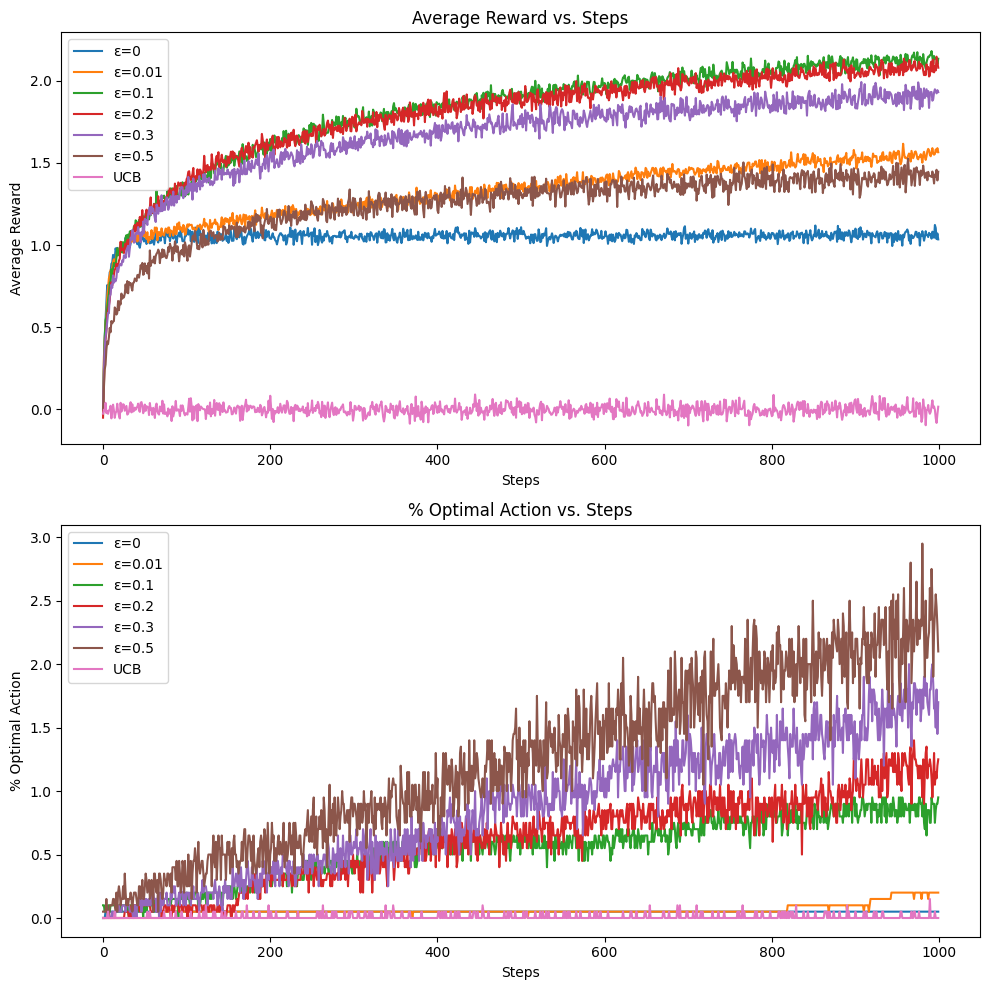

In [24]:
num_bandits = 2000
num_arms = 10000
num_steps = 1000
epsilons = [0, 0.01, 0.1, 0.2, 0.3, 0.5]
c = 2

def run_ucb_bandit_problem(num_bandits, num_arms, num_steps, c):
    rewards = np.zeros((num_bandits, num_steps))
    optimal_actions = np.zeros((num_bandits, num_steps))

    for bandit in range(num_bandits):
        q_star = np.random.randn(num_arms)
        optimal_action = np.argmax(q_star)

        q_estimates = np.zeros(num_arms)
        action_counts = np.zeros(num_arms)
        total_counts = 0

        for step in range(num_steps):
            if step < num_arms:
                action = step
            else:
                ucb_values = q_estimates + c * np.sqrt(np.log(total_counts + 1) / (action_counts + 1e-5))
                action = np.argmax(ucb_values)

            reward = np.random.randn() + q_star[action]
            action_counts[action] += 1
            total_counts += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

            rewards[bandit, step] = reward
            if action == optimal_action:
                optimal_actions[bandit, step] = 1

    avg_rewards = np.mean(rewards, axis=0)
    avg_optimal_actions = np.mean(optimal_actions, axis=0)

    return avg_rewards, avg_optimal_actions

def run_epsilon_greedy_bandit_problem(epsilon, num_bandits, num_arms, num_steps):
    rewards = np.zeros((num_bandits, num_steps))
    optimal_actions = np.zeros((num_bandits, num_steps))

    for bandit in range(num_bandits):
        q_star = np.random.randn(num_arms)
        optimal_action = np.argmax(q_star)

        q_estimates = np.zeros(num_arms)
        action_counts = np.zeros(num_arms)

        for step in range(num_steps):
            if np.random.rand() < epsilon:
                action = np.random.choice(num_arms)
            else:
                action = np.argmax(q_estimates)

            reward = np.random.randn() + q_star[action]
            action_counts[action] += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

            rewards[bandit, step] = reward
            if action == optimal_action:
                optimal_actions[bandit, step] = 1

    avg_rewards = np.mean(rewards, axis=0)
    avg_optimal_actions = np.mean(optimal_actions, axis=0)

    return avg_rewards, avg_optimal_actions

results = {}
for epsilon in epsilons:
    avg_rewards, avg_optimal_actions = run_epsilon_greedy_bandit_problem(epsilon, num_bandits, num_arms, num_steps)
    results[f'ε={epsilon}'] = (avg_rewards, avg_optimal_actions)

avg_rewards_ucb, avg_optimal_actions_ucb = run_ucb_bandit_problem(num_bandits, num_arms, num_steps, c)
results['UCB'] = (avg_rewards_ucb, avg_optimal_actions_ucb)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for label, (avg_rewards, avg_optimal_actions) in results.items():
    axes[0].plot(avg_rewards, label=label)
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Average Reward')
axes[0].legend()
axes[0].set_title('Average Reward vs. Steps')

for label, (avg_rewards, avg_optimal_actions) in results.items():
    axes[1].plot(avg_optimal_actions * 100, label=label)
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('% Optimal Action')
axes[1].legend()
axes[1].set_title('% Optimal Action vs. Steps')

plt.tight_layout()
plt.show()

### Observations from problem-3

ϵ=0.01 is showing quick initial gains due to immediate exploitation of the best-known actions.

Higher ϵ values like 0.2,0.3, 0.4, 0.5 is showing a more significant drop in early average rewards due to more frequent exploration.

The UCB algorithm due to uncertainty into its decision-making, is demonstrating a smoother and more consistent increase in both average rewards and the percentage of optimal actions.